In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../src'))
# Plotting setup
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("notebook")
from diagnostics import run_adf_test, calculate_var, calculate_sharpe_ratio

# Load enriched data
assets = {
    "TSLA": pd.read_csv("../data/processed/TSLA_enriched.csv", parse_dates=["Date"], index_col="Date"),
    "SPY": pd.read_csv("../data/processed/SPY_enriched.csv", parse_dates=["Date"], index_col="Date"),
    "BND": pd.read_csv("../data/processed/BND_enriched.csv", parse_dates=["Date"], index_col="Date")
}


In [2]:
# Run ADF test on both Close price and Daily Return
for name, df in assets.items():
    run_adf_test(df["Close"], f"{name} (Price)")
    run_adf_test(df["Daily_Return"], f"{name} (Return)")



🔍 ADF Test for TSLA (Price)
Test Statistic: -1.4189
P-value: 0.5732
Critical Values:
  1%: -3.4330
  5%: -2.8627
  10%: -2.5674
⚠️ Likely Non-Stationary (p ≥ 0.05)

🔍 ADF Test for TSLA (Return)
Test Statistic: -34.6811
P-value: 0.0000
Critical Values:
  1%: -3.4329
  5%: -2.8627
  10%: -2.5674
✅ Likely Stationary (p < 0.05)

🔍 ADF Test for SPY (Price)
Test Statistic: 0.6908
P-value: 0.9897
Critical Values:
  1%: -3.4329
  5%: -2.8627
  10%: -2.5674
⚠️ Likely Non-Stationary (p ≥ 0.05)

🔍 ADF Test for SPY (Return)
Test Statistic: -16.2644
P-value: 0.0000
Critical Values:
  1%: -3.4329
  5%: -2.8627
  10%: -2.5674
✅ Likely Stationary (p < 0.05)

🔍 ADF Test for BND (Price)
Test Statistic: -1.5363
P-value: 0.5155
Critical Values:
  1%: -3.4329
  5%: -2.8627
  10%: -2.5674
⚠️ Likely Non-Stationary (p ≥ 0.05)

🔍 ADF Test for BND (Return)
Test Statistic: -9.8898
P-value: 0.0000
Critical Values:
  1%: -3.4330
  5%: -2.8627
  10%: -2.5674
✅ Likely Stationary (p < 0.05)


In [3]:
print("📉 1-Day Historical Value at Risk (95%)")

for name, df in assets.items():
    var_95 = calculate_var(df["Daily_Return"], confidence=0.95)
    print(f"{name} VaR (95%): {var_95:.4f}")


📉 1-Day Historical Value at Risk (95%)
TSLA VaR (95%): 0.0547
SPY VaR (95%): 0.0172
BND VaR (95%): 0.0049


### 📉 1-Day Historical Value at Risk (95%)

| Asset | VaR (95%) | Interpretation |
|-------|-----------|----------------|
| **TSLA** | 0.0547 (5.47%) | There is a 5% chance that TSLA will lose **more than 5.47%** of its value in a single trading day. High VaR reflects high volatility and higher risk exposure. |
| **SPY**  | 0.0172 (1.72%) | There is a 5% chance that SPY will lose **more than 1.72%** of its value in a single trading day. This is much lower than TSLA, reflecting broader market stability. |
| **BND**  | 0.0049 (0.49%) | There is a 5% chance that BND will lose **more than 0.49%** of its value in a single trading day. Very low VaR indicates strong stability and minimal short-term risk. |

#### 🧠 Interpretation:
- **TSLA** has the highest daily market risk among the three assets, making it the most volatile and potentially rewarding, but also the riskiest.  
- **SPY** carries moderate daily risk as it represents a diversified equity market portfolio.  
- **BND** is the least risky, with very low potential daily losses at the 95% confidence level, making it suitable for capital preservation.


In [4]:
print("📈 Annualized Sharpe Ratios (risk-free rate = 1%)")

for name, df in assets.items():
    sharpe = calculate_sharpe_ratio(df["Daily_Return"])
    print(f"{name} Sharpe Ratio: {sharpe:.2f}")


📈 Annualized Sharpe Ratios (risk-free rate = 1%)
TSLA Sharpe Ratio: 0.76
SPY Sharpe Ratio: 0.74
BND Sharpe Ratio: 0.17


### 📈 Annualized Sharpe Ratios (Risk-Free Rate = 1%)

| Asset | Sharpe Ratio | Interpretation |
|-------|--------------|----------------|
| **TSLA** | 0.76 | TSLA has the highest Sharpe Ratio, meaning it delivered the best return relative to its volatility. However, it still carries high absolute volatility, so gains come with significant risk. |
| **SPY**  | 0.74 | SPY's risk-adjusted performance is close to TSLA’s but with much lower volatility, making it a strong candidate for balanced portfolios. |
| **BND**  | 0.17 | BND offers low returns relative to its volatility, indicating that while it is low risk, its return potential is also minimal compared to equities. |

#### 🧠 Interpretation:
- A **higher Sharpe Ratio** indicates better **risk-adjusted returns**.  
- **TSLA** and **SPY** have comparable Sharpe Ratios, but SPY achieves this with lower volatility.  
- **BND** is primarily a stability asset — it reduces overall portfolio risk but does not significantly contribute to return growth.


✅ Saved: ../results/plots\tsla_return_distribution.png


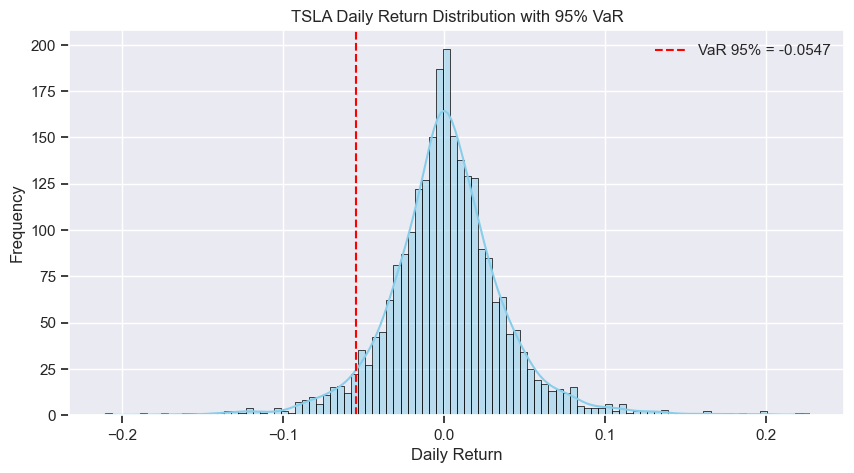

✅ Saved: ../results/plots\spy_return_distribution.png


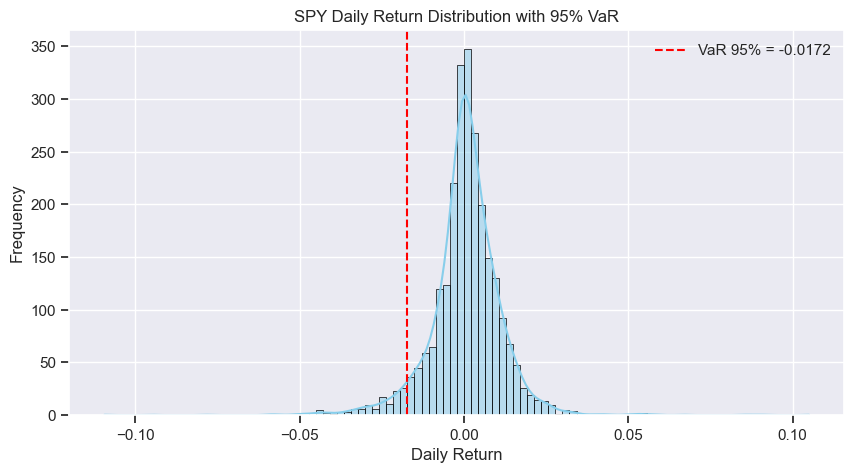

✅ Saved: ../results/plots\bnd_return_distribution.png


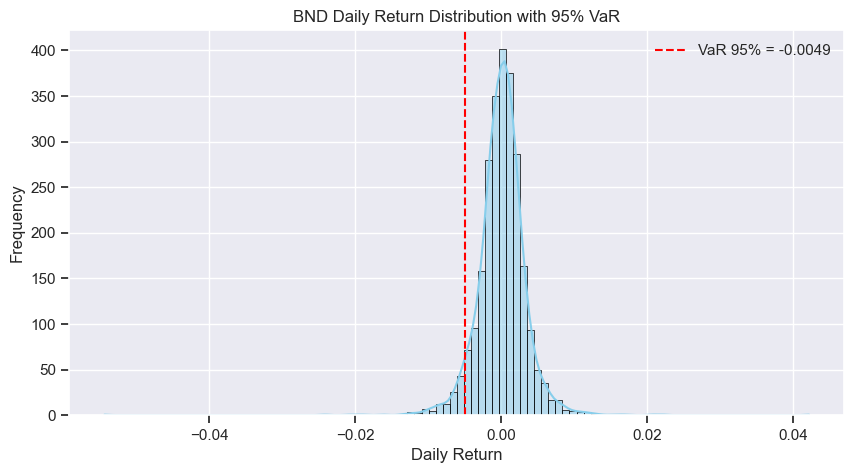

In [5]:
from diagnostics import plot_return_distribution_with_var

# Plot histogram + VaR line
for name, df in assets.items():
    plot_return_distribution_with_var(df["Daily_Return"], name)
